In [1]:
%run setup.ipynb

In [3]:
df = pd.read_csv(f'{DATA_PATH}/InfoComune.csv', encoding='latin-1')

In [4]:
df.head()

,ComID,CodRIP,CodREG,CodPROV,CodCOM,CodUTS,Name,Area (m2),UTM X (m E),UTM Y (m N),Lat (Deg N),Lon (Deg E),EOBS Points
0,1,1,1,1,201,1001,Agliè,13300000.0,404145.0229,5020000.0,45.365908,7.775986,4
1,2,1,1,1,201,1002,Airasca,16000000.0,380314.3611,4980000.0,44.921764,7.483505,4
2,3,1,1,1,201,1003,Ala di Stura,45800000.0,365323.4970,5020000.0,45.306805,7.282044,4
3,4,1,1,1,201,1004,Albiano d'Ivrea,11000000.0,417371.7088,5030000.0,45.431590,7.943660,4
4,5,1,1,1,201,1006,Almese,17700000.0,375740.6579,5000000.0,45.118005,7.420164,4


In [5]:
df = df[df['CodREG'] == 3]

In [6]:
df.shape

(1506, 13)

In [7]:
df['CodPROV'] = df['CodPROV'].astype(str)

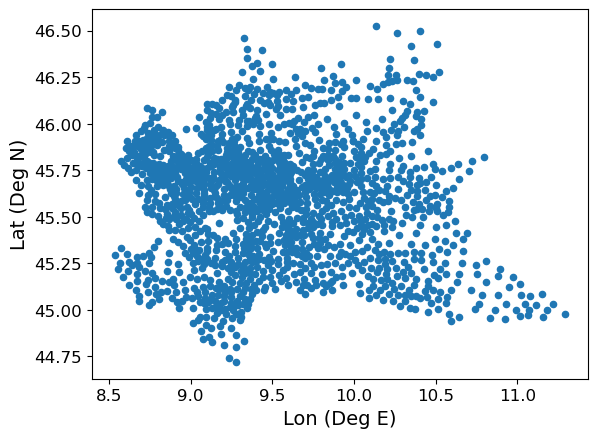

In [8]:
ax = df.plot(kind="scatter", x="Lon (Deg E)", y="Lat (Deg N)")
fig = ax.get_figure()
fig.savefig(fname=f'{IMAGES_PATH}/Lombardia1.png')
plt.show()

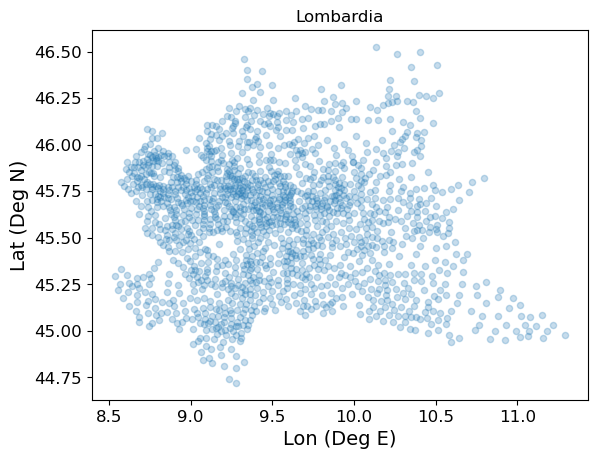

In [9]:
ax2 = df.plot(kind="scatter", x="Lon (Deg E)", y="Lat (Deg N)", alpha = 0.25)
fig = ax2.get_figure()
fig.savefig(fname=f'{IMAGES_PATH}/Lombardia2.png')
plt.title('Lombardia')
plt.show()

## GEO PLOT CLUSTERING RQ1

In [10]:
def assign_label(row):
    if row['CodPROV'] == '12' or row['CodPROV'] == '13' or row['CodPROV'] == '16' or row['CodPROV'] == '97' or row['CodPROV'] == '17' or row['CodPROV'] == '18':
        return 0
    elif row['CodPROV'] == '14':
        return 2
    elif row['CodPROV'] == '15' or row['CodPROV'] == '108':
        return 3
    elif row['CodPROV'] == '19' or row['CodPROV'] == '20' or row['CodPROV'] == '98':
        return 1
    else:
        return 'N/A'

In [11]:
df['label'] = df.apply(assign_label, axis=1)

In [12]:
df['label'].value_counts()

label
0    1004
1     237
3     188
2      77
Name: count, dtype: int64

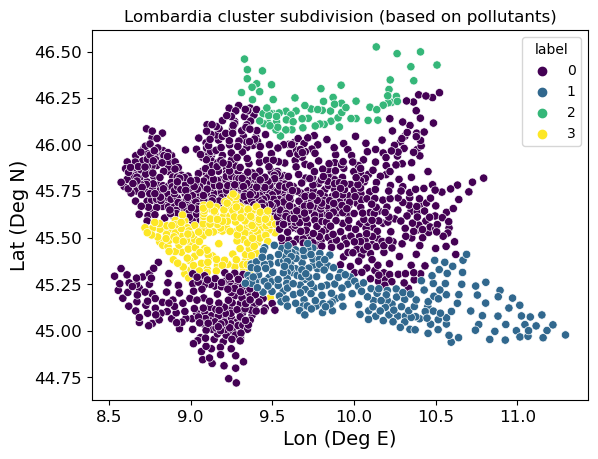

In [13]:
geoplot1 = sns.scatterplot(x="Lon (Deg E)", y="Lat (Deg N)", hue='label', data=df, palette='viridis')
fig = geoplot1.get_figure()
fig.savefig(fname=f'{IMAGES_PATH}/Geoplot_RQ1.png')
plt.title('Lombardia cluster subdivision (based on pollutants)')
plt.show()

### THE YELLOW POINT IN THE BLUE CLUSTER IS 'SAN COLOMBANO AL LAMBRO' CITY AND IT'S A MILANO EXCLAVE.

## TIME SERIES KMEANS GEOPLOT

In [14]:
def assign_label(row):
    if row['CodPROV'] == '12' or row['CodPROV'] == '13' or row['CodPROV'] == '16' or row['CodPROV'] == '97' or row['CodPROV'] == '17':
        return 0
    elif row['CodPROV'] == '14':
        return 2
    elif row['CodPROV'] == '19' or row['CodPROV'] == '20' or row['CodPROV'] == '98' or row['CodPROV'] == '18' or row['CodPROV'] == '108' or row['CodPROV'] == '15':
        return 1
    else:
        return 'N/A' 

In [15]:
df['label2'] = df.apply(assign_label, axis=1)
df['label2'].value_counts()

label2
0    818
1    611
2     77
Name: count, dtype: int64

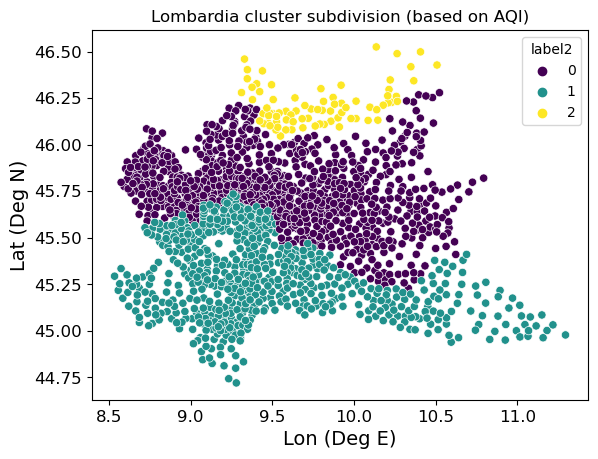

In [16]:
geoplot2 = sns.scatterplot(x="Lon (Deg E)", y="Lat (Deg N)", hue='label2', data=df, palette='viridis')
fig = geoplot2.get_figure()
fig.savefig(fname=f'{IMAGES_PATH}/Geoplot_RQ2.png')
plt.title('Lombardia cluster subdivision (based on AQI)')
plt.show()